模拟参数：囚犯数=100, 每人尝试盒子数=50, 模拟轮次=100000

随机策略成功率: 0.0000%
循环策略成功率: 31.1490%
耗时：随机策略 7.74s，循环策略 7.92s



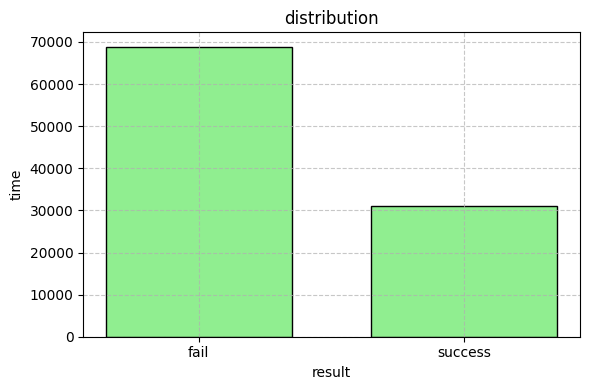

In [4]:
import random
import time
import matplotlib.pyplot as plt

# 随机策略：每个囚犯随机打开 K 个盒子寻找自己的编号
def simulate_random_strategy(N, K, T):
    success_count = 0
    for _ in range(T):
        boxes = list(range(N))
        random.shuffle(boxes)
        all_found = True
        for prisoner in range(N):
            choices = random.sample(range(N), K)
            if prisoner not in [boxes[i] for i in choices]:
                all_found = False
                break
        if all_found:
            success_count += 1
    return success_count / T

# 循环策略：从囚犯编号的盒子开始，跳转寻找自己的编号
def simulate_loop_strategy(N, K, T, collect_distribution=False):
    success_count = 0
    success_distribution = [] if collect_distribution else None

    for _ in range(T):
        boxes = list(range(N))
        random.shuffle(boxes)
        all_found = True
        for prisoner in range(N):
            idx = prisoner
            for _ in range(K):
                if boxes[idx] == prisoner:
                    break
                idx = boxes[idx]
            else:
                all_found = False
                break
        if all_found:
            success_count += 1
            if collect_distribution:
                success_distribution.append(1)
        elif collect_distribution:
            success_distribution.append(0)

    success_rate = success_count / T
    return (success_rate, success_distribution) if collect_distribution else success_rate

# 可视化结果分布（成功 vs 失败）
def plot_distribution(distribution):
    plt.figure(figsize=(6, 4))
    plt.hist(distribution, bins=[-0.5, 0.5, 1.5], rwidth=0.7, color='lightgreen', edgecolor='black')
    plt.xticks([0, 1], ['fail', 'success'])
    plt.title("distribution")
    plt.xlabel("result")
    plt.ylabel("time")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 主模拟函数（可调整 N/K/T）
def run_simulation(N=100, K=50, T=10000):
    print(f"模拟参数：囚犯数={N}, 每人尝试盒子数={K}, 模拟轮次={T}\n")

    start = time.time()
    random_rate = simulate_random_strategy(N, K, T)
    mid = time.time()
    loop_rate, distribution = simulate_loop_strategy(N, K, T, collect_distribution=True)
    end = time.time()

    print(f"随机策略成功率: {random_rate*100:.4f}%")
    print(f"循环策略成功率: {loop_rate*100:.4f}%")
    print(f"耗时：随机策略 {mid - start:.2f}s，循环策略 {end - mid:.2f}s\n")

    plot_distribution(distribution)

# 运行模拟（可以自定义参数）
run_simulation(N=100, K=50, T=100000)

模拟参数：囚犯数=100, 每人尝试盒子数=50, 模拟轮次=100000

随机策略成功率: 0.0000%
循环策略成功率: 31.2340%
耗时：随机策略 5.96s，循环策略 24.68s



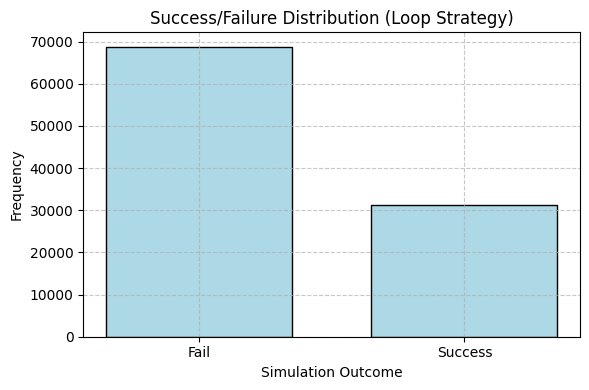

In [14]:
import numpy as np
import time
import matplotlib.pyplot as plt

# 随机策略：每个囚犯随机抽取 K 个盒子，查找是否存在自己的编号
def simulate_random_strategy(N, K, T):
    success_count = 0
    for _ in range(T):
        boxes = np.random.permutation(N)
        all_found = True
        for prisoner in range(N):
            choices = np.random.choice(N, size=K, replace=False)
            if prisoner not in boxes[choices]:
                all_found = False
                break
        if all_found:
            success_count += 1
    return success_count / T

# 循环策略：从囚犯编号的盒子开始，顺着编号链查找是否能在 K 次内找到自己
def simulate_loop_strategy(N, K, T, collect_distribution=False):
    success_count = 0
    success_distribution = [] if collect_distribution else None

    for _ in range(T):
        boxes = np.random.permutation(N)
        all_found = True
        for prisoner in range(N):
            idx = prisoner
            for _ in range(K):
                if boxes[idx] == prisoner:
                    break
                idx = boxes[idx]
            else:
                all_found = False
                break
        if all_found:
            success_count += 1
            if collect_distribution:
                success_distribution.append(1)
        elif collect_distribution:
            success_distribution.append(0)

    success_rate = success_count / T
    return (success_rate, success_distribution) if collect_distribution else success_rate

# 可视化：绘制成功/失败频率直方图
def plot_distribution(distribution):
    plt.figure(figsize=(6, 4))
    plt.hist(distribution, bins=[-0.5, 0.5, 1.5], rwidth=0.7, color='lightblue', edgecolor='black')
    plt.xticks([0, 1], ['Fail', 'Success'])
    plt.title("Success/Failure Distribution (Loop Strategy)")
    plt.xlabel("Simulation Outcome")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 主函数：运行模拟实验并打印结果
def run_simulation(N=100, K=50, T=100000):
    print(f"模拟参数：囚犯数={N}, 每人尝试盒子数={K}, 模拟轮次={T}\n")

    # 随机策略
    start = time.time()
    random_rate = simulate_random_strategy(N, K, T)
    mid = time.time()

    # 循环策略
    loop_rate, distribution = simulate_loop_strategy(N, K, T, collect_distribution=True)
    end = time.time()

    # 打印结果
    print(f"随机策略成功率: {random_rate*100:.4f}%")
    print(f"循环策略成功率: {loop_rate*100:.4f}%")
    print(f"耗时：随机策略 {mid - start:.2f}s，循环策略 {end - mid:.2f}s\n")

    # 绘图展示分布
    plot_distribution(distribution)

# 执行模拟（大规模实验时 T 可设置为 1e6+）
run_simulation(N=100, K=50, T=1000000)

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from numba import njit

# Numba 加速的随机策略
@njit
def simulate_random_strategy_numba(N, K, T):
    success_count = 0
    for _ in range(T):
        boxes = np.arange(N)
        for i in range(N - 1, 0, -1):
            j = np.random.randint(0, i + 1)
            boxes[i], boxes[j] = boxes[j], boxes[i]

        all_found = True
        for prisoner in range(N):
            # 从 0 到 N 中随机抽取 K 个不同的索引（不放回）
            choices = np.random.choice(N, K, replace=False)
            found = False
            for i in range(K):
                if boxes[choices[i]] == prisoner:
                    found = True
                    break
            if not found:
                all_found = False
                break

        if all_found:
            success_count += 1
    return success_count / T

# Numba 加速的循环策略
@njit
def simulate_loop_strategy_numba(N, K, T):
    success_count = 0
    distribution = np.zeros(T, dtype=np.int32)

    for t in range(T):
        boxes = np.arange(N)
        for i in range(N - 1, 0, -1):
            j = np.random.randint(0, i + 1)
            boxes[i], boxes[j] = boxes[j], boxes[i]

        all_found = True
        for prisoner in range(N):
            idx = prisoner
            for _ in range(K):
                if boxes[idx] == prisoner:
                    break
                idx = boxes[idx]
            else:
                all_found = False
                break

        if all_found:
            success_count += 1
            distribution[t] = 1
        else:
            distribution[t] = 0

    return success_count / T, distribution

# 可视化
def plot_distribution(distribution):
    plt.figure(figsize=(6, 4))
    plt.hist(distribution, bins=[-0.5, 0.5, 1.5], rwidth=0.7, color='lightgreen', edgecolor='black')
    plt.xticks([0, 1], ['fail', 'success'])
    plt.title("Success/Failure Distribution")
    plt.xlabel("Result")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 主函数
def run_simulation(N=100, K=50, T=100000):
    print(f"模拟参数：囚犯数={N}, 每人尝试盒子数={K}, 模拟轮次={T}\n")

    start = time.time()
    random_rate = simulate_random_strategy_numba(N, K, T)
    mid = time.time()
    loop_rate, distribution = simulate_loop_strategy_numba(N, K, T)
    end = time.time()

    print(f"随机策略成功率: {random_rate*100:.4f}%")
    print(f"循环策略成功率: {loop_rate*100:.4f}%")
    print(f"耗时：随机策略 {mid - start:.2f}s，循环策略 {end - mid:.2f}s\n")

    plot_distribution(distribution)

# 执行模拟
run_simulation()

ModuleNotFoundError: No module named 'numba'